In [32]:
import pandas as pd

data = {"price" :[20,34,33,50,22,19,1000]}
df = pd.DataFrame(data)

In [33]:
df.head()

,price
0,20
1,34
2,33
3,50
4,22


**How to detect outliers**

**1. IQR (interquartile range)** 

In [34]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
IQR = q3 - q1

print("Q1 = ", q1)
print("Q2 = ", q2)
print("IQR = ", IQR)

Q1 =  21.0
Q2 =  42.0
IQR =  21.0


In [35]:
outliers = df[(df["price"] < q1 - 1.5*IQR) | (df["price"] > q3 + 1.5*IQR)]

In [36]:
outliers

,price
6,1000


**2. Z-Score**

In [37]:
mean = df["price"].mean()
std = df["price"].std()
print(mean)
print(std)
for i in df["price"].values:
    z = ((i - mean) / std)
    if abs(z) > 2:
        print(i)

168.28571428571428
366.91266639611223
1000


**3. Visualization Technique**

In [24]:
import seaborn as sns

<Axes: xlabel='price'>

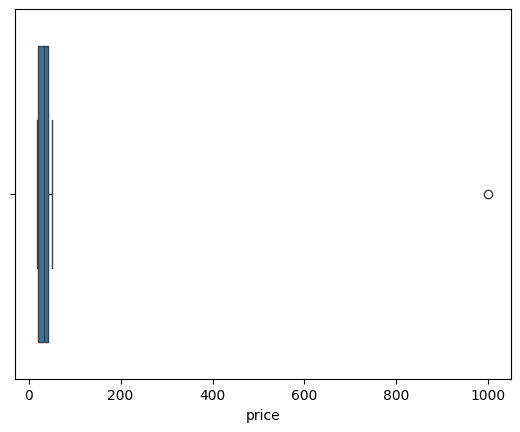

In [27]:

sns.boxplot(x=df["price"])

# How to handle outlier

**1. Remove Outlier (When they are error)**

using interquartile terms we can extract outlier

In [40]:
df_without_outlier = df[(df["price"] >= q1 - 1.5*IQR) & (df["price"] <= q3 + 1.5*IQR)]

In [41]:
df_without_outlier

,price
0,20
1,34
2,33
3,50
4,22
5,19


**2. Transformation**

it will only reduce effect of outlier 

In [ ]:
import numpy as np

df["log_price"] = np.log(df["price"] + 1)
df

**3. Modified Z-Score (Robust Z-Score)** 

use meedian & MAD, not mean -> very robust

In [43]:
median = df["price"].median()
mad = np.median(np.abs(df["price"] - median))

df["mz_score"] = 0.6745 * (df["price"] - median) / mad

In [44]:
df

,price,log_price,mz_score
0,20,3.044522,-0.674500
1,34,3.555348,0.051885
2,33,3.526361,0.000000
3,50,3.931826,0.882038
4,22,3.135494,-0.570731
5,19,2.995732,-0.726385
6,1000,6.908755,50.172423


**4. Local Outlier Factor (LOF)**

Compare loca; density of a point with neighbors 

In [51]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5)
df['outlier'] = lof.fit_predict(df[['price']])

In [52]:
df

,price,log_price,mz_score,outlier
0,20,3.044522,-0.674500,1
1,34,3.555348,0.051885,1
2,33,3.526361,0.000000,1
3,50,3.931826,0.882038,1
4,22,3.135494,-0.570731,1
5,19,2.995732,-0.726385,1
6,1000,6.908755,50.172423,-1
